# 1.Cosine similarity

In [1]:
import wikipedia

In [2]:
#Mathematicians
Leonhard = wikipedia.page("Leonhard Euler")
Carl = wikipedia.page("Carl Friedrich Gauss")
Andrew = wikipedia.page("Andrew Wiles")
Euclid=wikipedia.page("Euclid")
Fibonacci = wikipedia.page("Fibonacci")

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [4]:
import numpy as np

In [5]:
def cosine (a,b):
    a=np.array(a)
    b=np.array(b)
    return(np.sum(a*b)/np.sqrt(np.sum(a**2)*np.sum(b**2)))
def euclidean(a,b):
    distance = np.sqrt(np.sum((np.array(a)-np.array(b))**2))   
    return(distance)

In [6]:
#football player
Messi = wikipedia.page("Lionel Messi")
Ronaldo = wikipedia.page("Cristiano Ronaldo")
Robben = wikipedia.page("Arjen Robben")
Sunil=wikipedia.page("Sunil Chhetri")
Jeje = wikipedia.page("Jeje Lalpekhlua")

In [7]:
#businessman
Ambani = wikipedia.page("Mukesh Ambani")
Premji = wikipedia.page("Azim Premji")
Warren = wikipedia.page("Warren Buffett")
Mark=wikipedia.page("Mark Zuckerberg")
Jeff = wikipedia.page("Jeff Bezos")

In [8]:
#Space Research Agency
ISRO = wikipedia.page("Indian Space Research Organisation")
NASA = wikipedia.page("NASA")
ESA = wikipedia.page("European Space Agency")
Roscosmos=wikipedia.page("Roscosmos")
JAXA = wikipedia.page("JAXA")

In [28]:
X = np.array(cv.fit_transform([
                               Messi.content,Ronaldo.content,Robben.content,Sunil.content,Jeje.content,
                              Ambani.content,Premji.content,Warren.content,Mark.content,Jeff.content,
                              ISRO.content,NASA.content,ESA.content, Roscosmos.content,JAXA.content,
Leonhard.content,Carl.content,Andrew.content,Euclid.content,Fibonacci.content]).toarray())

In [29]:
name=["Messi","Ronaldo","Robben","Sunil","Jeje",
      "Ambani","Premji","Warren","Mark","Jeff",
      "ISRO","NASA",'ESA',"Roscosmos","JAXA",
"Leonhard","Carl","Andrew","Euclid","Fibonacci"]

In [49]:
def l2_normalize(v):
    norm = np.sqrt(np.sum(np.square(v)))
    return v / norm

## A. Without Normalization

In [66]:
#Clustering
def cosinesimilarity(X):
    k=[]
    for i in range(0,len(X)):
        temp=[]
        te=[]
        for j in range (i+1,len(X)):
            if i not in k: # to avoid condition like dist(1,2) and dist(2,1)
                if j not in k: 
                    te.append(i) #temporary storing i value 
                    temp.append([cosine(X[i],X[j]),i,j]) # temporary storing cosine similarity values
        temp.sort(reverse=True) # to get maximum value of cosine similarity
        te=np.unique(te) #avoid repetition
        if len(te)==1: # to avoid out of range error while appending to k 
            k.append(te[0])
        #mina.append(temp)
        #k.append(te[0])
        if len(temp)>=5: # only considering top 5
            for m in range(4):
                k.append(temp[m][2])

    for i in range(20):# appending remaining value
        if i not in k:
            k.append(i)
    return(k)
k=cosinesimilarity(X)

In [64]:
#creating list as per the order of k 
names=[]
for i in k:
    names.append(name[i])

### Output

In [65]:
#clusiering is done in this way: [1,2,3,4,5,6,7,8]=>1st cluster=[1,2,3,4] 2nd cluster=[5,6,7,8]
for i in range(0,20,5):
    print(names[i:i+5])

['Messi', 'Ronaldo', 'Robben', 'Sunil', 'Jeje']
['Ambani', 'Jeff', 'Warren', 'Carl', 'Leonhard']
['Premji', 'Andrew', 'Mark', 'ISRO', 'Roscosmos']
['NASA', 'ESA', 'JAXA', 'Euclid', 'Fibonacci']


In [14]:
#Original Group
for i in range(0,20,5):
    print(name[i:i+5])

['Leonhard', 'Carl', 'Andrew', 'Euclid', 'Fibonacci']
['Messi', 'Ronaldo', 'Robben', 'Sunil', 'Jeje']
['Ambani', 'Premji', 'Warren', 'Mark', 'Jeff']
['ISRO', 'NASA', 'ESA', 'Roscosmos', 'JAXA']


## B. With L2_Normalization 

In [67]:
#Clustering
def cosine_l2norm(X):
    k=[]
    for i in range(0,len(X)):
        temp=[]
        te=[]
        for j in range (i+1,len(X)):
            if i not in k: # to avoid condition like dist(1,2) and dist(2,1)
                if j not in k: 
                    te.append(i) #temporary storing i value 
                    temp.append([cosine(l2_normalize(X[i]),l2_normalize(X[j])),i,j]) # temporary storing cosine similarity values
        temp.sort(reverse=True) # to get maximum value of cosine similarity
        te=np.unique(te) #avoid repetition
        if len(te)==1: # to avoid out of range error while appending to k 
            k.append(te[0])
        #mina.append(temp)
        #k.append(te[0])
        if len(temp)>=5: # only considering top 5
            for m in range(4):
                k.append(temp[m][2])

    for i in range(20):# appending remaining value
        if i not in k:
            k.append(i)
    #creating list as per the order of k 
    names=[]
    for i in k:
        names.append(name[i])
    return(names)
names=cosine_l2norm(X)

### Output

In [68]:
for i in range(0,20,5):
    print(names[i:i+5])

['Messi', 'Ronaldo', 'Robben', 'Sunil', 'Jeje']
['Ambani', 'Jeff', 'Warren', 'Carl', 'Leonhard']
['Premji', 'Andrew', 'Mark', 'ISRO', 'Roscosmos']
['NASA', 'ESA', 'JAXA', 'Euclid', 'Fibonacci']


# 2. Euclidean Distance

## A. Without Normalization

In [69]:
#Clustering
def eucli(X):
    k=[]
    for i in range(0,len(X)):
        temp=[]
        te=[]
        for j in range (i+1,len(X)):
            if i not in k: # to avoid condition like dist(1,2) and dist(2,1)
                if j not in k: 
                    te.append(i) #temporary storing i value 
                    temp.append([euclidean(X[i],X[j]),i,j]) # temporary storing Euclidean distance values
        temp.sort(reverse=False) # to get minimum value of euclidean distance
        te=np.unique(te) #avoid repetition
        if len(te)==1: # to avoid out of range error while appending to k 
            k.append(te[0])
        #mina.append(temp)
        #k.append(te[0])
        if len(temp)>=5: # only considering top 5
            for m in range(4):
                k.append(temp[m][2])

    for i in range(20):# appending remaining value
        if i not in k:
            k.append(i)
            names=[]
    for i in k:
        names.append(name[i])
    for i in range(0,20,5):
        print(names[i:i+5])
eucli(X)

['Messi', 'Ronaldo', 'NASA', 'Warren', 'ISRO']
['Robben', 'Sunil', 'Jeff', 'Carl', 'Mark']
['Jeje', 'Ambani', 'Andrew', 'Premji', 'Fibonacci']
['ESA', 'Roscosmos', 'JAXA', 'Leonhard', 'Euclid']


## B. With L2_Normalization

In [71]:
#Clustering
def ecli_l2norm(X):
    k=[]
    for i in range(0,len(X)):
        temp=[]
        te=[]
        for j in range (i+1,len(X)):
            if i not in k: # to avoid condition like dist(1,2) and dist(2,1)
                if j not in k: 
                    te.append(i) #temporary storing i value 
                    temp.append([euclidean(l2_normalize(X[i]),l2_normalize(X[j])),i,j]) # temporary storing Euclidean distance values
        temp.sort(reverse=False) # to get minimum value of euclidean distance
        te=np.unique(te) #avoid repetition
        if len(te)==1: # to avoid out of range error while appending to k 
            k.append(te[0])
        #mina.append(temp)
        #k.append(te[0])
        if len(temp)>=5: # only considering top 5
            for m in range(4):
                k.append(temp[m][2])

    for i in range(20):# appending remaining value
        if i not in k:
            k.append(i)
            names=[]
    for i in k:
        names.append(name[i])
    for i in range(0,20,5):
        print(names[i:i+5])
ecli_l2norm(X)

['Messi', 'Ronaldo', 'Robben', 'Sunil', 'Jeje']
['Ambani', 'Jeff', 'Warren', 'Carl', 'Leonhard']
['Premji', 'Andrew', 'Mark', 'ISRO', 'Roscosmos']
['NASA', 'ESA', 'JAXA', 'Euclid', 'Fibonacci']


## 3.Using 4-NN clustering

In [75]:
Predicted=pd.DataFrame(name, columns=["Name"])

In [90]:
k = 4
def eucli(X,k):
    euc=[]
    euci=[]
    cos=[]
    cosi=[]
    for i in range(20):
        dist=[]
        disti=[]
        ang=[]
        angi=[]
        for j in range(20):
            if i!= j:
                d = euclidean(X[i],X[j])
                di= euclidean(l2_normalize(X[i]),l2_normalize(X[j]))
                dist.append((d,i,j))
                dist.sort()
                disti.append((di,i,j))
                disti.sort()
                c = cosine(X[i],X[j])
                ci= cosine(l2_normalize(X[i]),l2_normalize(X[j]))
                ang.append((c,i,j))
                ang.sort(reverse=True)
                angi.append((ci,i,j))
                angi.sort(reverse=True)
        t=[]
        m=[]
        n=[]
        o=[]
        for p in range(k):        
            t.append(name[dist[p][2]])
            m.append(name[disti[p][2]])
            n.append(name[ang[p][2]])
            o.append(name[angi[p][2]])
        euc.append(t)
        euci.append(m)
        cos.append(n)
        cosi.append(o)
    Predicted["Euclidean Distance"]=euc
    Predicted["Euclidean Distance with L2 norm"]=euci
    Predicted["Cosine Similarity"]=cos
    Predicted["Cosine Similarity with L2 norm"]=cosi
    return(Predicted)
eucli(X,4)

,Name,Euclidean Distance,Euclidean Distance with L2 norm,Cosine Similarity,Cosine Similarity with L2 norm
0,Messi,"[Ronaldo, NASA, Warren, ISRO]","[Ronaldo, Robben, Sunil, Jeje]","[Ronaldo, Robben, Sunil, Jeje]","[Ronaldo, Robben, Sunil, Jeje]"
1,Ronaldo,"[Messi, NASA, Warren, Robben]","[Messi, Robben, Sunil, Jeje]","[Messi, Robben, Sunil, Jeje]","[Messi, Robben, Sunil, Jeje]"
2,Robben,"[Sunil, Jeff, Carl, Mark]","[Ronaldo, Messi, Sunil, Jeje]","[Ronaldo, Messi, Sunil, Jeje]","[Ronaldo, Messi, Sunil, Jeje]"
3,Sunil,"[Robben, Jeje, Roscosmos, Carl]","[Jeje, Ronaldo, Messi, Robben]","[Jeje, Ronaldo, Messi, Robben]","[Jeje, Ronaldo, Messi, Robben]"
4,Jeje,"[Ambani, Andrew, Premji, Fibonacci]","[Sunil, Ronaldo, Messi, Robben]","[Sunil, Ronaldo, Messi, Robben]","[Sunil, Ronaldo, Messi, Robben]"
5,Ambani,"[Andrew, Premji, Fibonacci, Euclid]","[Jeff, Warren, Carl, Messi]","[Jeff, Warren, Carl, Messi]","[Jeff, Warren, Carl, Messi]"
6,Premji,"[Fibonacci, Andrew, Ambani, Euclid]","[Warren, Ambani, Jeff, Carl]","[Warren, Ambani, Jeff, Carl]","[Warren, Ambani, Jeff, Carl]"
7,Warren,"[Mark, Jeff, Carl, Leonhard]","[Jeff, Ambani, Mark, Carl]","[Jeff, Ambani, Mark, Carl]","[Jeff, Ambani, Mark, Carl]"
8,Mark,"[Carl, Leonhard, Jeff, Robben]","[Warren, Leonhard, Carl, NASA]","[Warren, Leonhard, Carl, NASA]","[Warren, Leonhard, Carl, NASA]"
9,Jeff,"[Carl, Sunil, Mark, Leonhard]","[Warren, Ambani, Messi, Ronaldo]","[Warren, Ambani, Messi, Ronaldo]","[Warren, Ambani, Messi, Ronaldo]"


# 3.Agglomerative clustering

In [15]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [16]:
import pandas as pd

In [59]:
data=pd.DataFrame(X)
df=data.copy()
data1=data.copy()

## A. With cosine similarity

In [51]:
hclust = AgglomerativeClustering(n_clusters=4, affinity='cosine', linkage='complete')

In [52]:
hclust.fit(data)
labels=hclust.labels_

In [53]:
data['Groups'] = hclust.labels_
data["Names"]=name

In [54]:
data

,0,1,2,3,4,5,6,7,8,9,...,11618,11619,11620,11621,11622,11623,11624,11625,Groups,Names
0,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Messi
1,8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ronaldo
2,0,0,1,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,Robben
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Sunil
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Jeje
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ambani
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Premji
7,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Warren
8,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Mark
9,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Jeff


### Output

In [55]:
for i in range(4):
    print(list(data.Names[data.Groups==i]))

['Ambani', 'Premji', 'Warren', 'Mark', 'Jeff', 'Leonhard', 'Carl', 'Andrew']
['Messi', 'Ronaldo', 'Robben', 'Sunil', 'Jeje']
['Euclid', 'Fibonacci']
['ISRO', 'NASA', 'ESA', 'Roscosmos', 'JAXA']


## B. With Euclidean Distance

In [60]:
hclust1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
hclust1.fit(data1)
labels=hclust1.labels_
data1['Groups'] = hclust1.labels_
data1["Names"]=name
data1

,0,1,2,3,4,5,6,7,8,9,...,11618,11619,11620,11621,11622,11623,11624,11625,Groups,Names
0,6,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,Messi
1,8,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ronaldo
2,0,0,1,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,Robben
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Sunil
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,Jeje
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,Ambani
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,Premji
7,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Warren
8,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Mark
9,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Jeff


### Output

In [62]:
for i in range(4):
    print(list(data1.Names[data1.Groups==i]))

['Robben', 'Sunil', 'Warren', 'Mark', 'Jeff', 'ISRO', 'NASA', 'ESA', 'JAXA', 'Leonhard', 'Carl']
['Ronaldo']
['Jeje', 'Ambani', 'Premji', 'Roscosmos', 'Andrew', 'Euclid', 'Fibonacci']
['Messi']


# 4.Dendrogram

In [23]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [57]:
Z = linkage(df, 'complete')

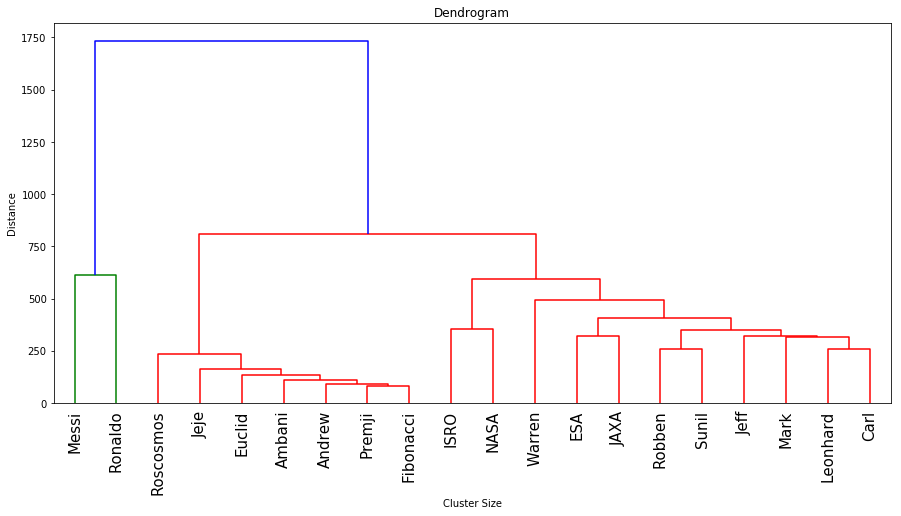

In [58]:
plt.figure(figsize=(15,7))
dendrogram(Z,leaf_rotation=90, leaf_font_size=15,labels=name)
plt.title("Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.show()